# Белов Дмитрий Алексеевич 
# 19-ИВТ-2
## Лабораторная работа №3
## Вариант 4

In [1]:
%matplotlib inline

import warnings
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn import preprocessing, neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import seaborn as sns

import numpy as np

In [2]:
warnings.simplefilter('ignore') #Скрыть все предупреждения от пользователей по умолчанию
iris_df = pd.read_csv('iris.data.csv',header = None) #header - удаление заголовка, жля перевода таблицы в DataFrame
iris_df.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'] #Название колонок

In [3]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Задание 1
### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [4]:
tabledata = [["sepal length in cm", "длина чашелистика в см", "числовой"],
             ["sepal width in cm", "ширина чашелистика в см","числовой"],
             ["petal length in cm", "длина лепестка в см","числовой"],
             ["petal width in cm", "ширина лепестка в см","числовой"],
             [" species", "вид","Ирис Сетоза,Ирис Версиколор,Ирис Виргиника"],] #создание новой таблицы
tabledata
pd.DataFrame(tabledata, columns=[" Атрибутивная информация","Описание", "Параметры(Ключи)"]) #название колонок

,Атрибутивная информация,Описание,Параметры(Ключи)
0,sepal length in cm,длина чашелистика в см,числовой
1,sepal width in cm,ширина чашелистика в см,числовой
2,petal length in cm,длина лепестка в см,числовой
3,petal width in cm,ширина лепестка в см,числовой
4,species,вид,"Ирис Сетоза,Ирис Версиколор,Ирис Виргиника"


# Задание 2
### Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [5]:
iris_df.shape #shape - размера, формы и размеров фреймов данных и серий.

(150, 5)

In [6]:
iris_df = iris_df.drop_duplicates() #drop_duplicates - помогает удалить дубликаты из фрейма данных.
iris_df.shape

(147, 5)

In [7]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Задание 3
### Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

Species
Iris-setosa        48
Iris-versicolor    50
Iris-virginica     49
Name: Species, dtype: int64

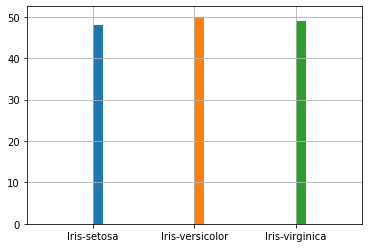

In [8]:
iris_df.groupby(['Species'])['Species'].hist() #hist - сгенерировать гистограмму
iris_df.groupby(['Species'])['Species'].count() #count() используется для подсчета числа

#### Соотношение количество элементов отличается не сильно, поэтому будем считать, что классы сбалансированы. Кривые ROC подходят, когда наблюдения сбалансированы между каждым классом, тогда как PR кривые точного отзыва подходят для несбалансированных наборов данных

# Задание 4
### Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [1]:
numerical = [i for i in iris_df.columns if iris_df[i].dtype.name != 'object'] # цикл для отбра колонок с количественными признаками
categorial = [i for i in iris_df.columns if iris_df[i].dtype.name == 'object'] # цикл для отбора качественных признаков
print("Numerical",numerical)
print("Categorial",categorial)

NameError: name 'iris_df' is not defined

<AxesSubplot:>

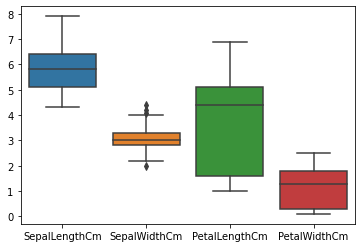

In [10]:
sns.boxplot(data=iris_df[numerical]) #Вывод диаграммы boxplot количествнных столбцов

<AxesSubplot:>

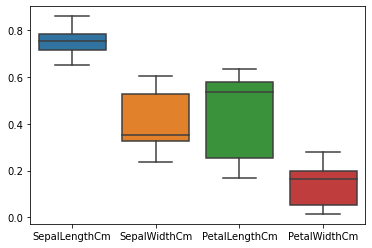

In [11]:
iris_df[numerical] = preprocessing.normalize(iris_df[numerical]) #normalize() - Этот метод нормализует данные по строке
sns.boxplot(data=iris_df[numerical]) #вывод маштабированной диаграммы boxplot

In [12]:
iris_df #после нормализации все значения теперь находятся в диапазоне от 0 до 1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.803773,0.551609,0.220644,0.031521,Iris-setosa
1,0.828133,0.507020,0.236609,0.033801,Iris-setosa
2,0.805333,0.548312,0.222752,0.034269,Iris-setosa
3,0.800030,0.539151,0.260879,0.034784,Iris-setosa
4,0.790965,0.569495,0.221470,0.031639,Iris-setosa
...,...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699,Iris-virginica
146,0.729654,0.289545,0.579090,0.220054,Iris-virginica
147,0.716539,0.330710,0.573231,0.220474,Iris-virginica
148,0.674671,0.369981,0.587616,0.250281,Iris-virginica


# Задание 5
###  Выполните замену категориальных признаков;выберите и обоснуйте способ замены;

In [13]:
labelEncoder = LabelEncoder() #Создание экземпляра объекта LabelEncoder
iris_df['Species'] = labelEncoder.fit_transform(iris_df['Species']) #Применение LabelEncoder к колонке Species
iris_df #Вывод таблицы

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.803773,0.551609,0.220644,0.031521,0
1,0.828133,0.507020,0.236609,0.033801,0
2,0.805333,0.548312,0.222752,0.034269,0
3,0.800030,0.539151,0.260879,0.034784,0
4,0.790965,0.569495,0.221470,0.031639,0
...,...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699,2
146,0.729654,0.289545,0.579090,0.220054,2
147,0.716539,0.330710,0.573231,0.220474,2
148,0.674671,0.369981,0.587616,0.250281,2


# Задание 6
### Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

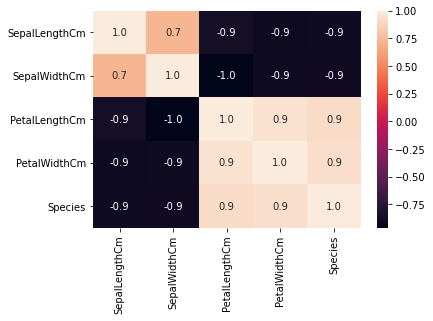

In [14]:
iris_corr_df = iris_df.corr() #создание нового фрейма по корреляции
sns.heatmap(iris_corr_df, annot=True, fmt='.1f')
#Метод .corr() - будет добавлен к данным в качестве первого аргумента
#annot=True, который помогает отобразить коэффициент корреляции.
# fmt = '.1g' - отображение одной цифры, после запятой 

# Задание 7
### Заполните пропущенные значения в данных;

In [130]:
iris_df.notnull().count() #вывод ненулевых значений и их подсчет

SepalLengthCm    147
SepalWidthCm     147
PetalLengthCm    147
PetalWidthCm     147
Species          147
dtype: int64

#### Пропущенных значений нет

# Задание 8
### Решите поставленную задачу классификации в соответствии с заданием.

### Классификатор К ближайших соседей

In [16]:
#разбиваем наш набор на массив с данными и массив с классами
x = np.array(iris_df.drop('Species', axis=1)) #переменная x содержит массив с данными
y = np.array(iris_df['Species']) #Переменная y содержит массив классов
#Бинаризируем выходные данные(преобразуем свои данные, используя двоичный порог. Все значения выше порога помечены как 1, а все равные или ниже помечены как 0.)
y = label_binarize(y, classes=[0, 1, 2]) 
n_classes = y.shape[1]
# Перетасовка и разделение тренировочного и тестового набораююЧтобы избежать переобучения, мы разделим наш набор данных на обучающие и тестовые разбиения, что даст нам лучшее представление о том, как работает наш алгоритм на этапе тестирования.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)#разбивает набор данных на 50% обучающих данных и 50% тестовых данных.
print(X_train.shape) #Обучающий набор
print(X_test.shape) #текстовый набор

(73, 4)
(74, 4)


In [17]:
knn = KNeighborsClassifier() #Классификатор К ближайших соседей

find = GridSearchCV(knn,{'n_neighbors':range(1,50)}) #Gridsearch подбирает наилучшие параметры для классификатора(соседи)
find.fit(X_train,y_train)

neighbor = find.best_estimator_.n_neighbors #записываем количество соседей
best_score = find.best_score_ #лучшее значение классификатора, которое он выдает

knn = KNeighborsClassifier(n_neighbors=neighbor)#передаем классификатору neighbor количество соседей
knn.fit(X_train,y_train) #обучаем его
predict = knn.predict(X_test) #предсказанные значения 
print('Accuracy of KNN model: ',accuracy_score(y_test,predict)) #выводим точность
print('Best score: ',best_score,'Neighbor: ',neighbor) #Выводим наилучший счет и количество соседей

Accuracy of KNN model:  0.972972972972973
Best score:  0.9866666666666667 Neighbor:  5


### Логический классификатор(бинарное решающее дерево)

In [18]:
dtc = DecisionTreeClassifier() #классификатор решающего дерева


dtc_grid = GridSearchCV(dtc, {'max_depth':list(range(1,100)),'max_features':list(range(1,5))})#Gridsearch подбирает наилучшие параметры для классификатора(Глубина и количество признаков)
dtc_grid.fit(X_train,y_train)

best_depth = dtc_grid.best_estimator_.max_depth #записываем лучший показатель шлубины
best_features = dtc_grid.best_estimator_.max_features #записываем лучший показатель количества признаков

dtc = DecisionTreeClassifier(max_depth = best_depth, max_features = best_features) #передаем классификатору dtc эти параметры
dtc.fit(X_train, y_train) #обучаем его
predict = dtc.predict(X_test) #предсказанные значения
accuracy_score = np.mean(y_test == dtc.predict(X_test)) #новой переменной присваивается показатель точности

print('Accuracy of DTC model: ',accuracy_score) #выводим точность классификатора
print('Best score: ', dtc_grid.best_score_) #выводим лучший результат классификатора
print('On depth ',best_depth,' features ',best_features) #выводим глубино и количество признаков

Accuracy of DTC model:  0.9099099099099099
Best score:  0.9733333333333334
On depth  15  features  1


### ROC-кривая

<Figure size 720x576 with 0 Axes>

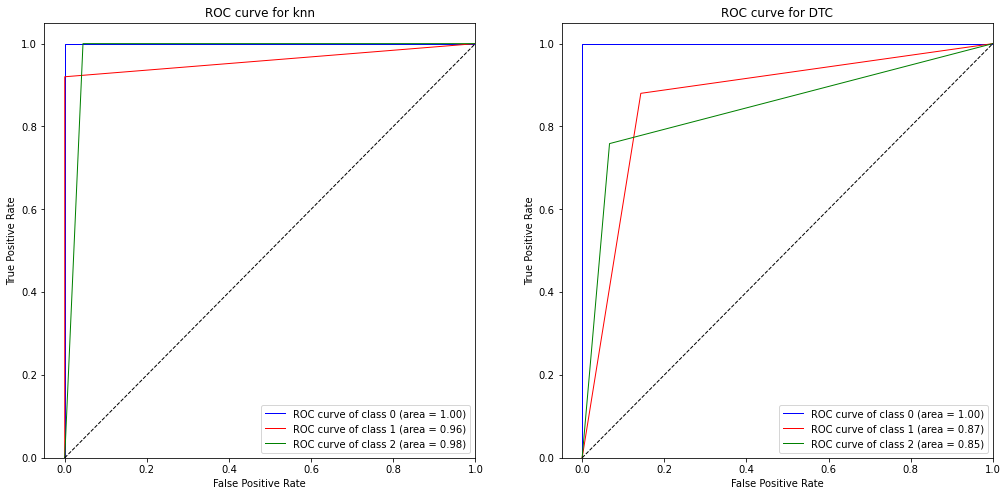

In [19]:
plt.figure(figsize=(10,8))
fig, (ax_0, ax_1) = plt.subplots(nrows=1, ncols=2, figsize=(17, 8))  #разбиваем область на два графика

predict = knn.predict(X_test) #график для К соседей
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes): #цикл который для каждого класса строит кривую
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors): #цикл считает площадь под кривой
    ax_0.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
ax_0.plot([0, 1], [0, 1], 'k--', lw=1)
ax_0.set_xlim([-0.05, 1.0])
ax_0.set_ylim([0.0, 1.05])
ax_0.set_xlabel('False Positive Rate')
ax_0.set_ylabel('True Positive Rate')
ax_0.set_title('ROC curve for knn')
ax_0.legend(loc="lower right")

predict = dtc.predict(X_test) #график для решающего дерева
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes) :#цикл который для каждого класса строит кривую
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):  #цикл считает площадь под кривой
    ax_1.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
ax_1.plot([0, 1], [0, 1], 'k--', lw=1)
ax_1.set_xlim([-0.05, 1.0]) #значение по оси x
ax_1.set_ylim([0.0, 1.05]) #значение по оси y
ax_1.set_xlabel('False Positive Rate') #название по оси x
ax_1.set_ylabel('True Positive Rate') #название по оси x
ax_1.set_title('ROC curve for DTC') #вывод площадь под кривой
ax_1.legend(loc="lower right")

plt.show()

### PR-кривая

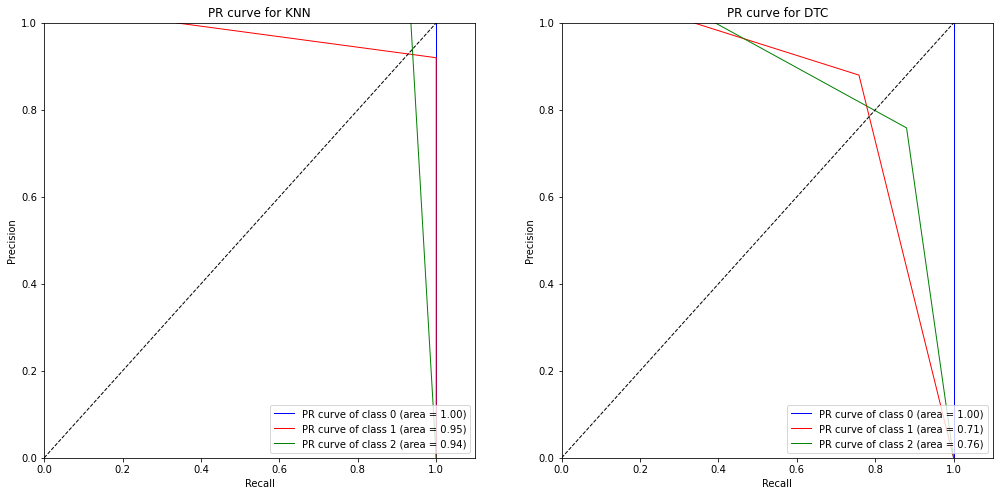

In [20]:
fig, (ax_0, ax_1) = plt.subplots( nrows=1, ncols=2, figsize=(17, 8))  

predict = knn.predict(X_test)
precision = dict()
recall = dict()
aps = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predict[:, i])
    aps[i] = average_precision_score(y_test[:, i], predict[:, i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    ax_0.plot(precision[i], recall[i], color=color, lw=1,
             label='PR curve of class {0} (area = {1:0.2f})'
             ''.format(i, aps[i]))
ax_0.plot([0, 1], [0, 1], 'k--', lw=1)
ax_0.set_xlim([0.0, 1.1])
ax_0.set_ylim([0.0, 1.0])
ax_0.set_xlabel('Recall')
ax_0.set_ylabel('Precision')
ax_0.set_title('PR curve for KNN')
ax_0.legend(loc="lower right")



predict = dtc.predict(X_test)
precision = dict()
recall = dict()
aps = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predict[:, i])
    aps[i] = average_precision_score(y_test[:, i], predict[:, i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    ax_1.plot(precision[i], recall[i], color=color, lw=1,
             label='PR curve of class {0} (area = {1:0.2f})'
             ''.format(i, aps[i]))
ax_1.plot([0, 1], [0, 1], 'k--', lw=1)
ax_1.set_xlim([0.0, 1.1])
ax_1.set_ylim([0.0, 1.0])
ax_1.set_xlabel('Recall')
ax_1.set_ylabel('Precision')
ax_1.set_title('PR curve for DTC')
ax_1.legend(loc="lower right")
plt.show()

# Задание 9
### Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

#### Метод К ближайших сосоедей имеет лучший показатель точности, чем бинарно-решающее дерево